In [144]:
import numpy as np
import sympy as sp
import scipy.constants as sc
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

#global symbols
global m, hbar, om 
m, hbar, om = sp.symbols('m hbar omega', real = True, positive = True)
global x
x = sp.Symbol('x', real = True)
#global sympy constants
global i
i = sp.I
global oo
oo = sp.oo
#global values of constants
global hbar_
hbar_ = 1.0 #can be changed to scipy.constants.hbar
class wave:
    def __init__(self, mass, omega, n_, number_of_lattice_points = 500, xs_range = 10):
        
        self.m = mass
        self.om = omega
        self.n = n_
        self.xs_range = xs_range
        self.latice_points = number_of_lattice_points
        self.V = wave.harmonic_potential(self.m, self.om, self.latice_points)
        self.xs = np.linspace(-self.xs_range/2, self.xs_range/2, self.latice_points)
        self.dx = self.xs_range / self.latice_points
        self.psi = self.psi_num(self.n, self.xs)
        
    def normalization_test(self):
        test_sum = 0.0
        for psi_n in self.psi:
            test_sum += np.conjugate(psi_n) * psi_n
        test_sum *= self.dx
        return test_sum
        # print('c = ', test_sum)
        # print('error = ', "{:e}".format((np.abs(1 - test_sum) * 100)), '%')
    
    #returns np.array of real than imaginary parts
    def split(self):
        return self.psi.real, self.psi.imag
    
    #Schrödinger hamiltonian
    #assumption:
    #space on the edges is connected (if needs changing than fix only n==0 and n == self.latice_points - 1 cases)
    def E_i(self, i):
        #special edge of array cases 
        if i == 0:
            return -hbar_/(2 *self.m * self.dx**2) * (self.psi[self.latice_points - 1] - 2 * self.psi[0] + self.psi[1]) + self.V[0] * self.psi[0]
        if i == self.latice_points - 1:
            return -hbar_/(2 *self.m * self.dx**2) * (self.psi[i-1 - 1] - 2 * self.psi[i - 1] + self.psi[0]) + self.V[i - 1] * self.psi[i - 1]
        #default option
        return -hbar_/(2 *self.m * self.dx**2) * (self.psi[i-1] - 2 * self.psi[i] + self.psi[i+1]) + self.V[i] * self.psi[i]
    
    #Integral of Schrödinger hamiltonian over entire space
    def E_total(self):
        total = 0.0
        for n in range(self.latice_points):
            #print(np.conjugate(self.psi[n]) * self.E_i(n))
            total += np.conjugate(self.psi[n]) * self.E_i(n)
        total *= self.dx
        return total
    
    #Static method for creation of harmonic potentials as numpy arrays
    @staticmethod
    def harmonic_potential(m, omega, number_of_latice_points):
        V = np.zeros(number_of_latice_points)
        for x in range(number_of_latice_points):
            V[x] = 1/2 * m * omega**2 * (x - number_of_latice_points/2)**2
        return V
    #n-th stationary state as nummpy array of values
    @staticmethod
    def psi_n(n_):
        #for t == 0
        psi_n = sp.exp(- (m * om) / (2 * hbar) * x**2)
        for i in range(n_):
            psi_n = wave.a_p(psi_n).simplify()
        psi_n *= (m * om / (sp.pi * hbar))**wave.frac(1/4) * (1 / (sp.factorial(n_)))**wave.frac(1/2)
        
        return psi_n
    #lambdifying psi_n function
    @staticmethod
    def lambdify_psi(psi_n_):
        symbols = [m, om, hbar, x]
        f = lambdify(symbols, psi_n_)
        return f
    
    def psi_num(self, n_stationary_state, x_position):
        ans = wave.lambdify_psi(wave.psi_n(n_stationary_state))
        return ans(self.m, self.om, hbar_, x_position)
    #Ladder creation operator
    @staticmethod
    def a_p(Psi):
        return 1/sp.sqrt(2 * hbar * m * om) * (- i * wave.p_hat(Psi) + m * om * x * Psi)
    @staticmethod
    def p_hat(Psi_x):
        return hbar/i * sp.diff(Psi_x, x)
    
    #Rational fractions
    @staticmethod
    def frac(a):
        return sp.Rational(a)
    @staticmethod
    def symbolic_normalization(Psi_x, a = -oo, b = oo):
        return sp.integrate(sp.conjugate(Psi_x) * Psi_x, (x, a, b))
    #simply plots real and imaginary parts of the function
    def plot(self):
        fig = plt.figure(figsize = (16, 8))
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel(r'$x$', size = 25)
        ax1.xaxis.set_major_locator(plt.MultipleLocator(self.xs_range / 10))
        
        ax1.set_xlim([self.xs.min(), self.xs.max()])
        ax1.set_ylabel(r'$|\Psi(x)|^2 $', size = 25)
        
        
        ax1.plot(self.xs, self.psi * np.conjugate(self.psi), label = r'\rho(x)')
        
        ax1.set_ylim(bottom = 0)
        ax2 = ax1.twinx()
        ax2.set_ylabel(r'$V(x)$', size = 25)
        ax2.plot(self.xs, self.V, color = 'green')
        ax2.set_ylim(bottom = 0)
        plt.show()
        

In [146]:
print(wave(1, 1, n_ = 0, xs_range = 1, number_of_lattice_points = 100).E_total())

202.16876466016404


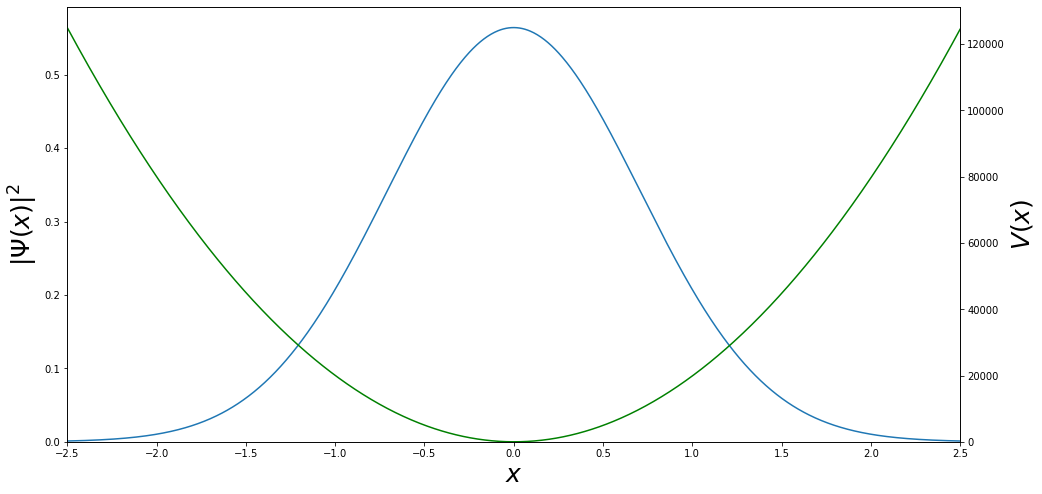

In [127]:
t = wave(1, 1, n_ = 0, xs_range = 5, number_of_lattice_points = 1000)
t.plot()
#print(t.E_total(), (t.n + 1/2) * hbar_ * t.om)

In [128]:
t.normalization_test()
#t.plot()

0.9985988779321552

In [41]:
type(t.E_total())

numpy.float64